In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def model(x, p): 
    return p[0] * x * np.exp(-p[1]*x)

def dataset(p, x_max, max_err, n):
    err = max_err * np.random.uniform(-1,1,n)
    x = x_max * np.random.uniform(0,1,n)
    x.sort()
    y = model(x,p) + err
    return x,y

In [3]:
def get_err_func(x,y,model):
    def err_func_(p):
        return np.sum((model(x,p) - y)**2)
    return err_func_

def grad(func, point: np.ndarray, h):
    grad_ = np.zeros((point.size,))
    h_ = np.zeros(point.size)
    for i in range(point.size):
        h_[i] = h
        grad_[i] = (func(point + h_) - func(point - h_)) / (2*h)
        h_[i] = 0
    return grad_

def GD_fit(model,x,y,p0,niter=1000, h=0.01, delta=0.01):
    p = np.copy(p0)
    err_func = get_err_func(x,y,model)
    err = np.zeros((niter))
    for i in range(niter):
        p -= delta * grad(err_func, p, h)
        err[i] = err_func(p)
    
    return p, err

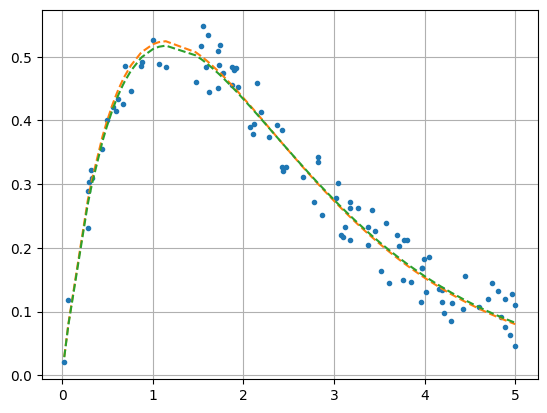

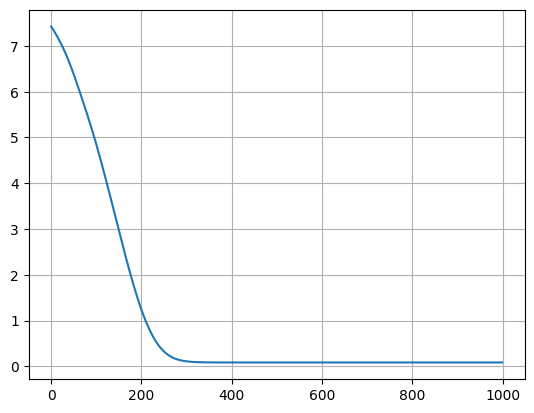

In [4]:
n_points = 100
x_max = 5.

A, B = 1.24, 0.87
p = np.array([A,B])
x, y = dataset(p,x_max,0.05,100)

p0=np.array([5,3], dtype=np.float64)

popt, err = GD_fit(model,x,y,p0)
plt.plot(x,y,'.')
plt.plot(x,model(x,p),'--')
plt.plot(x,model(x,popt),'--')
plt.grid()
plt.show()

plt.plot(err)
plt.grid()
plt.show()

In [6]:
popt, p

(array([1.20911614, 0.85952287]), array([1.24, 0.87]))